<a href="https://colab.research.google.com/github/gui98araujo/Machine_Learning_Projects/blob/main/C%C3%B3pia_de_Clusterizacao_Hierarquica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização Hierárquica #

-Características:

. Necessita, assim como o k-means, precisa de dados numéricos contínuos na mesma escala

. Requer definição de separações entre clusters

. Técnica responsável pelos dendogramas(*).
(Fornece um aspecto visual de quais grupos estão mais evidentes e quais observações estão mais próximas de quais)

. Possibilita a escolha de clusters visualmente, não é necessário especificar inicialmente e sim visualmente depois

. Algoritimo simples

. Com muitas observações não é possível interpretar muito bem o dendograma

. Muito infuenciável dependendo das métricas que estão sendo utilizadas.

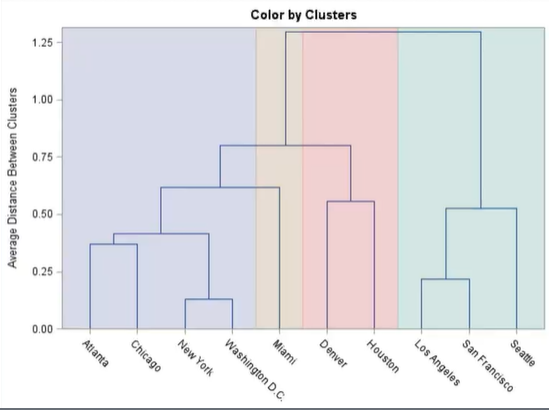![image.png]()

Para saber a proximidade entre os clusters é necessário observar o eixo y e as distancias entre as variáveis. Quanto mais alto maior a distancia e quanto mais baixo menor a distancia e mais próxima são as variáveis.

Método aglomerativo.

In [ ]:
%%capture
%pip install kmodes

In [ ]:
#Data Wrangling
import numpy as np
import pandas as pd


#Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import kelbow_visualizer, SilhouetteVisualizer, KElbowVisualizer, silhouette_visualizer

## -- Machine Learning -- ##

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from kmodes.kmodes import KModes      # clustering Categorical data
from kmodes.kprototypes import KPrototypes # clustering mixed data

#Didatic purposes
import string
from ipywidgets import interact

In [ ]:
sns.set_theme(
    context='talk',
    style = 'ticks',
    font_scale =0,
    palette='tab10',
    rc = {
        'figure.figsize':(12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad':20,
    }
)

scatter_kwargs = dict(palette='viridis',alpha = 0.8, lidewidth = 0)

In [ ]:
X,y = datasets.make_blobs(n_samples = int(80), n_features =  2, centers = 4, cluster_std = .8, random_state = 0)
df = pd.DataFrame(X, columns = list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.864189,8.266859
1,-0.020383,1.839675
2,-1.114917,8.343485
3,2.427797,-0.331331
4,-1.288313,3.978991


In [ ]:

# Hierarquical Clustering with sklearn

model = AgglomerativeClustering(n_clusters = 4)
labels = model.fit_predict(X)



<AxesSubplot:xlabel='A', ylabel='B'>

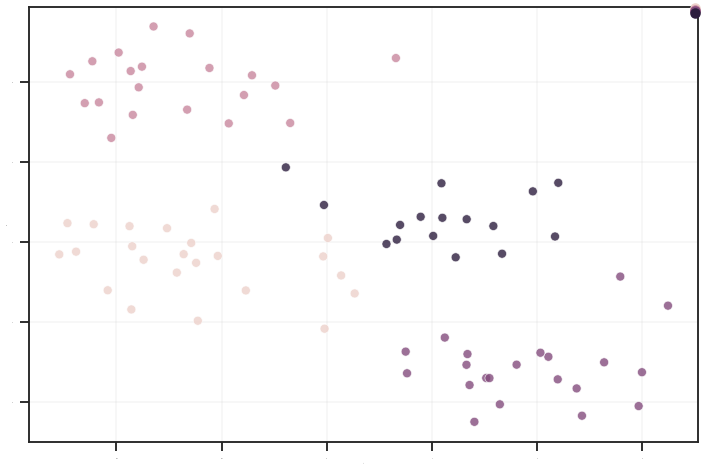

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue = labels, alpha=.8)